# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [48]:
import pandas as pd

# load the training dataset
data = pd.read_csv('C:\\Users\\cadams4\\Documents\\Personal\\ml-notebooks\\real-estate.csv')
data.head(100)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
95,2012.917,8.0,104.81010,5,24.96674,121.54067,51.8
96,2013.417,6.4,90.45606,9,24.97433,121.54310,59.5
97,2013.083,28.4,617.44240,3,24.97746,121.53299,34.6
98,2013.417,16.4,289.32480,5,24.98203,121.54348,51.0


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

View the label distribution

Text(0.5, 0.98, 'Label Distribution')

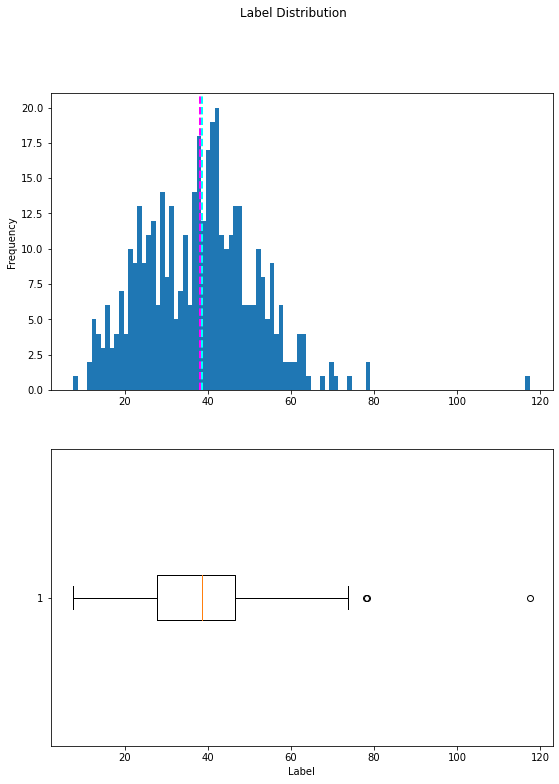

In [50]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')
%matplotlib inline

# set up list for reference
features = ["transaction_date", "house_age", "transit_distance", "local_convenience_stores", "latitude", "longitude", "price_per_unit"]

# get label column
label = data["price_per_unit"]

# Create a figure for 2 subplots
fig, ax = plt.subplots(2, 1, figsize= (9,12))

# plot histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# add lines for the mean, median and mode
ax[0].axvline(label.mean(), color="magenta", linestyle="dashed", linewidth=2)
ax[0].axvline(label.median(), color="cyan", linestyle="dashed", linewidth=2)

# plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel("Label")

# add a title
fig.suptitle("Label Distribution")


Remove Outliers

Text(0.5, 0.98, 'Label Distribution')

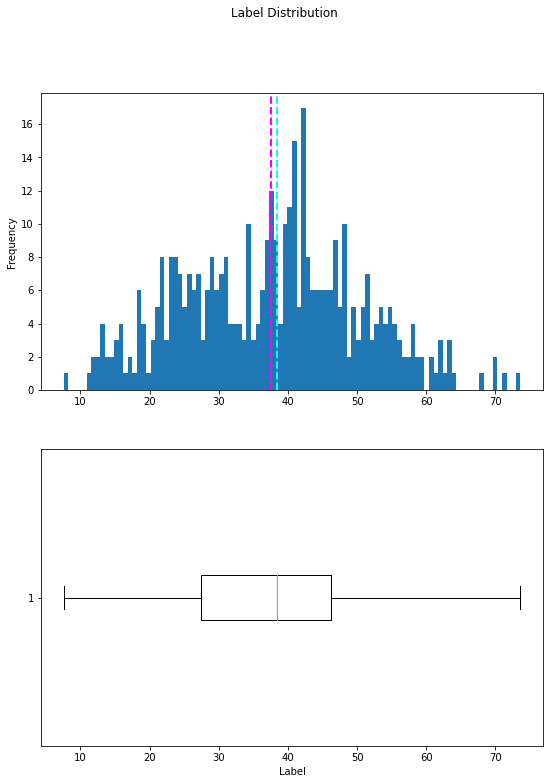

In [52]:
# calculate upper and lower bounds for outliers
iqr = label.quantile(0.75) - label.quantile(0.25)
upper_limit = label.quantile(0.75) + (1.5 * iqr)
lower_limit = label.quantile(0.25) - (1.5 * iqr)

# remove outliers from dataframe
data = data[(data["price_per_unit"] > lower_limit) & (data["price_per_unit"] < upper_limit)]

# get label column
label = data["price_per_unit"]

# Create a figure for 2 subplots
fig, ax = plt.subplots(2, 1, figsize= (9,12))

# plot histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# add lines for the mean, median and mode
ax[0].axvline(label.mean(), color="magenta", linestyle="dashed", linewidth=2)
ax[0].axvline(label.median(), color="cyan", linestyle="dashed", linewidth=2)

# plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel("Label")

# add a title
fig.suptitle("Label Distribution")

View numeric feature distributions

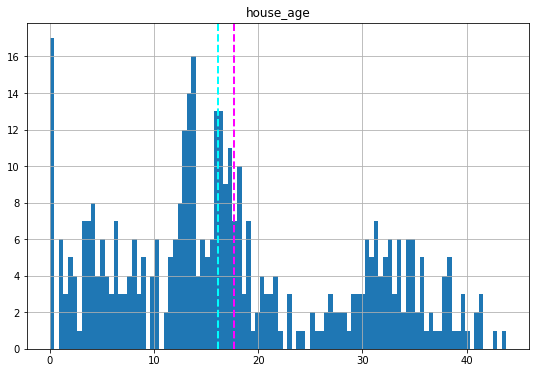

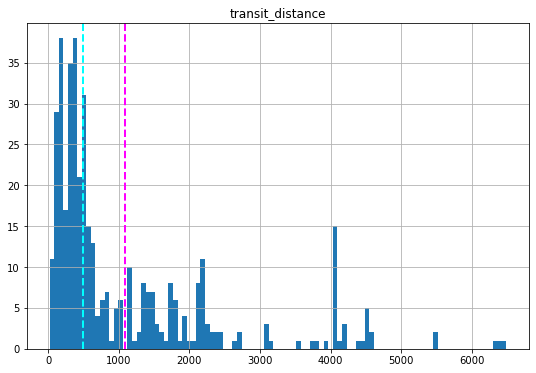

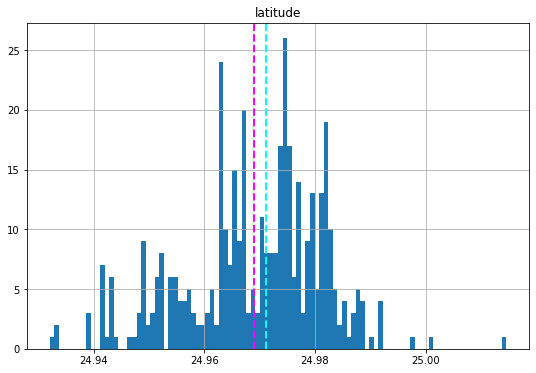

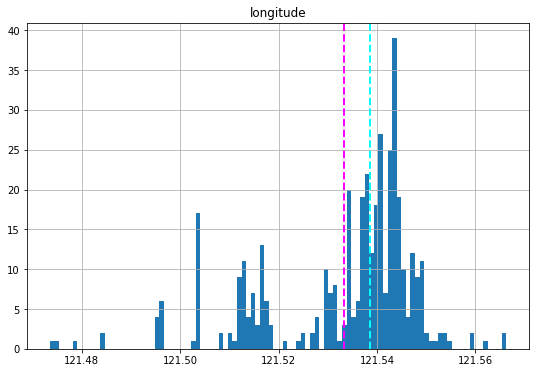

In [54]:
# collect only numeric features
numeric_features = ["house_age", "transit_distance", "latitude", "longitude"]

# Plot a histogram for each
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)


View categorical feature distributions

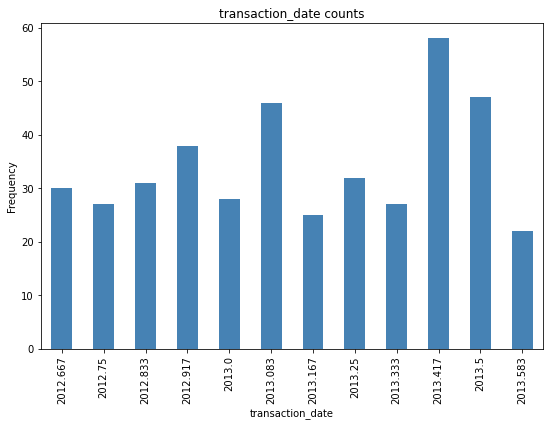

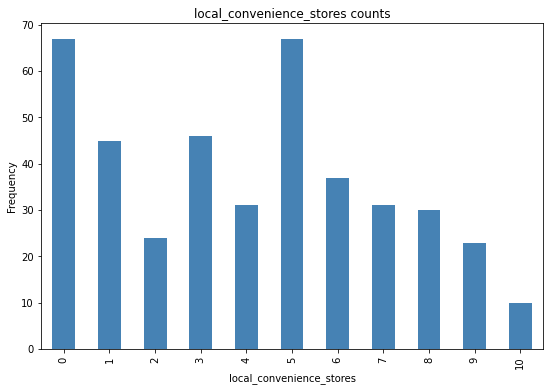

In [63]:
categorical_features = ["transaction_date", "local_convenience_stores"]

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts = data[col].value_counts().sort_index()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

View numeric correlations

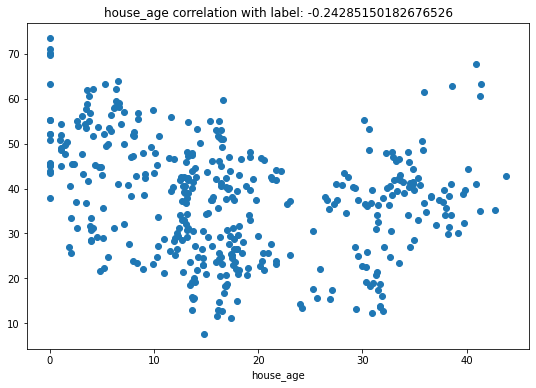

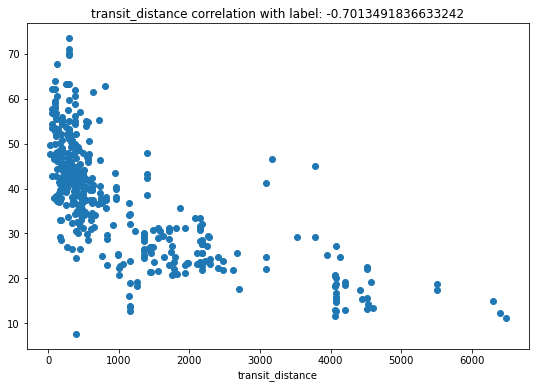

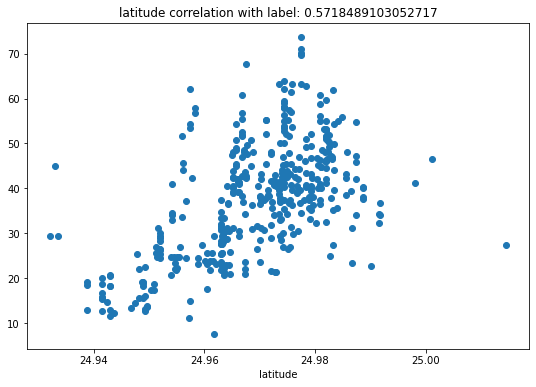

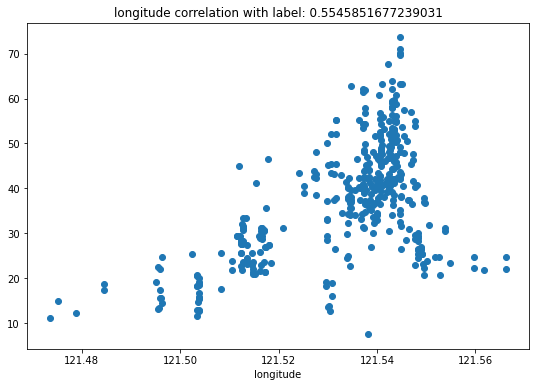

In [69]:
# Plot a histogram for each
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    ax.scatter(feature, label)
    plt.xlabel(col)
    ax.set_title(f"{col} correlation with label: {correlation}")

View categorical correlations

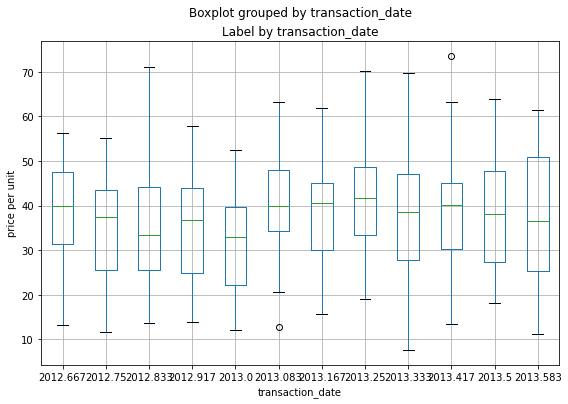

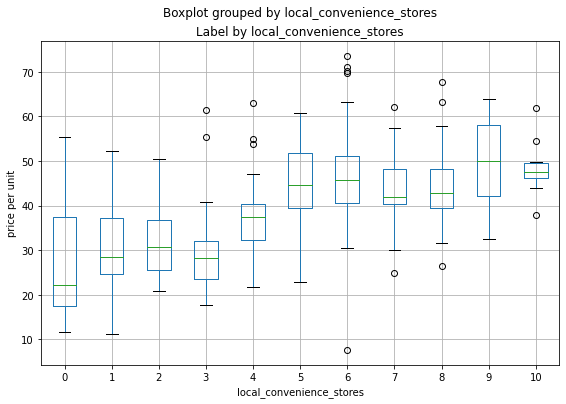

In [72]:
# Plot a box plot for each
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data.boxplot(column = "price_per_unit", by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("price per unit")

Separate features and label and split data for training and validation

In [105]:
from sklearn.model_selection import train_test_split

# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = data[["house_age", "transit_distance", "local_convenience_stores", "latitude", "longitude"]].values, data[["price_per_unit"]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
y_train, y_test = y_train.reshape(-1), y_test.reshape(-1)

print (f'Training Set: {X_train.shape[0]} rows\nTest Set: {X_test.shape[0]} rows')

Training Set: 287 rows
Test Set: 124 rows


In [97]:
from sklearn.model_selection import train_test_split

# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 287, rows
Test Set: 124 rows


Preprocess the data and train a model in a pipeline

Normalize the numeric features, then use a RandomForestRegressor to train a model.


In [107]:
# Train the model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
#from sklearn.impute import SimpleImputer
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())
                    ])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


Evaluate the model

MSE:  39.24972325300573
RMSE: 6.264959956217257
R2: 0.7228308728346491


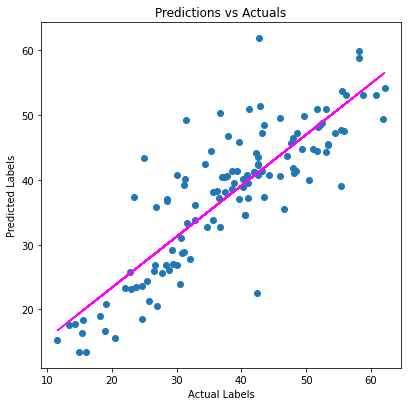

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
# create a canvas (container)
fig = plt.figure(figsize=(10,6))
# create an area for the chart
ax = plt.axes((0.1,0.1,0.5,0.8))
ax.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1) # retreive OLS function coefficients between test labels and predictions
p = np.poly1d(z) # create function from coefficients
plt.plot(y_test,p(y_test), color='magenta') # plot regression line using test labels and predicted labels from function

# Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

In [113]:
import joblib

# Save the model as a pickle file
filename = 'C:\\Users\\cadams4\\Documents\\Personal\\ml-notebooks\\real_estate_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
50.96
16.43
